In [1]:
#importing the necssary libary and packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

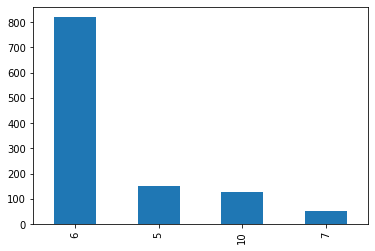

In [2]:
data=pd.read_csv("data/final_modified_data.csv")

#EDA OF THE DATA
data['Starting month'].value_counts().plot.bar()
plt.show()

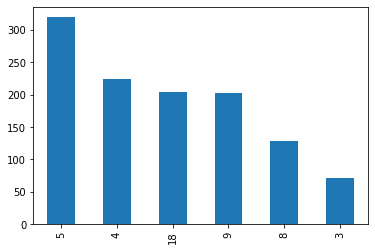

In [3]:
data['Cultivation Time'].value_counts().plot.bar()
plt.show()

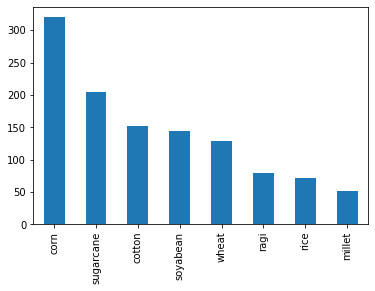

In [4]:
data['Crops'].value_counts().plot.bar()
plt.show()

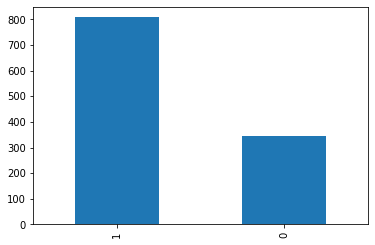

In [5]:
data['Irrigation'].value_counts().plot.bar()
plt.show()

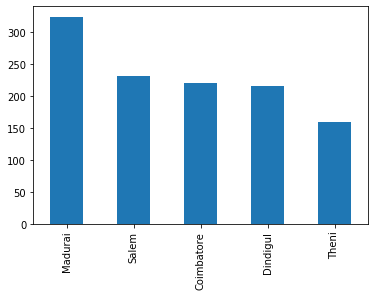

In [6]:
data['dis'].value_counts().plot.bar()
plt.show()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

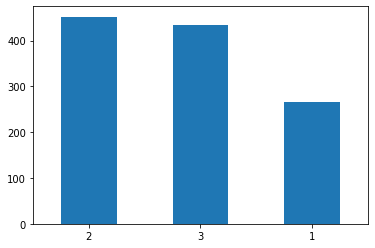

In [7]:
data['Soil'].value_counts().plot.bar()
plt.xticks(rotation='horizontal')

In [8]:
#nanalysis of data
print(data.head())
print("----------------------------------------------------------------------------------------------------------")
print(data.tail())
print("----------------------------------------------------------------------------------------------------------")
print(data.shape)
print("----------------------------------------------------------------------------------------------------------")
print(data.size)
print("----------------------------------------------------------------------------------------------------------")
print(data.info())
print("----------------------------------------------------------------------------------------------------------")
print(data.describe())
print("----------------------------------------------------------------------------------------------------------")
print(data.dtypes)

   Unnamed: 0  Starting month  Cultivation Time  Min-Temp   Max-Temp   \
0           0               6                 3         24         28   
1           1               6                 3         25         26   
2           2               6                 3         26         31   
3           3               6                 3         24         26   
4           4               6                 3         23         27   

   Rainfall Requirement  Humidity   Crops  Irrigation    dis  Soil   area   \
0                   956          69  rice           0  Salem     1  1254.0   
1                  1200          85  rice           0  Salem     1     2.0   
2                  1540          82  rice           0  Salem     3   102.0   
3                  1345          79  rice           0  Salem     3   176.0   
4                  1111          67  rice           0  Salem     3   720.0   

   production  
0      2000.0  
1         1.0  
2       321.0  
3       641.0  
4       165.

In [9]:
#checking presence of any null value or not
print("-------------------------------------------------------------------------------------------------------------")
print(data.isnull().values.any())
print("-------------------------------------------------------------------------------------------------------------")
print(data.isnull())
print("-------------------------------------------------------------------------------------------------------------")
print(data.isnull().sum())

-------------------------------------------------------------------------------------------------------------
False
-------------------------------------------------------------------------------------------------------------
      Unnamed: 0  Starting month  Cultivation Time  Min-Temp   Max-Temp   \
0          False           False             False      False      False   
1          False           False             False      False      False   
2          False           False             False      False      False   
3          False           False             False      False      False   
4          False           False             False      False      False   
...          ...             ...               ...        ...        ...   
1147       False           False             False      False      False   
1148       False           False             False      False      False   
1149       False           False             False      False      False   
1150       Fal

In [29]:
#feature selection
#taking the necessary inputs from the data
dx=data.iloc[:,1:-1]
dx
#ananlysis of input
print(dx.shape)
print(dx.size)
print(dx.info())
print(dx.columns)
print(dx)

(1152, 11)
12672
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 11 columns):
Starting month          1152 non-null int64
Cultivation Time        1152 non-null int64
Min-Temp                1152 non-null int64
Max-Temp                1152 non-null int64
Rainfall Requirement    1152 non-null int64
Humidity                1152 non-null int64
Crops                   1152 non-null object
Irrigation              1152 non-null int64
dis                     1152 non-null object
Soil                    1152 non-null int64
area                    1152 non-null float64
dtypes: float64(1), int64(8), object(2)
memory usage: 99.1+ KB
None
Index(['Starting month', 'Cultivation Time', 'Min-Temp ', 'Max-Temp ',
       'Rainfall Requirement', 'Humidity  ', 'Crops', 'Irrigation', 'dis',
       'Soil', 'area '],
      dtype='object')
      Starting month  Cultivation Time  Min-Temp   Max-Temp   \
0                  6                 3         24         28   

In [30]:
dx

,Starting month,Cultivation Time,Min-Temp,Max-Temp,Rainfall Requirement,Humidity,Crops,Irrigation,dis,Soil,area
0,6,3,24,28,956,69,rice,0,Salem,1,1254.0
1,6,3,25,26,1200,85,rice,0,Salem,1,2.0
2,6,3,26,31,1540,82,rice,0,Salem,3,102.0
3,6,3,24,26,1345,79,rice,0,Salem,3,176.0
4,6,3,23,27,1111,67,rice,0,Salem,3,720.0
...,...,...,...,...,...,...,...,...,...,...,...
1147,6,4,25,31,774,75,soyabean,1,Madurai,2,82.0
1148,6,4,23,30,1065,71,soyabean,1,Madurai,2,304.0
1149,6,4,24,29,1179,66,soyabean,1,Madurai,2,1776.0
1150,6,4,22,28,1245,57,soyabean,1,Madurai,2,62049.0


In [31]:
#takking the output
dy=data[["production"]]
print(dy.isnull().sum())
print(len(dy))

production    0
dtype: int64
1152


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dx["Crops"]=le.fit_transform(dx["Crops"])
dx["dis"]=le.fit_transform(dx["dis"])

In [33]:
dx
dx.isnull().sum()

Starting month          0
Cultivation Time        0
Min-Temp                0
Max-Temp                0
Rainfall Requirement    0
Humidity                0
Crops                   0
Irrigation              0
dis                     0
Soil                    0
area                    0
dtype: int64

In [34]:
dy
dy.isnull().sum()

production    0
dtype: int64

In [35]:
#prepare rhe data for bo0th tarining and testing
from sklearn.model_selection import train_test_split
X_train,X_test,ytrain,ytest=train_test_split(dx,dy,test_size=0.10,random_state=42)
#checking the length of the tarining and testing data
print(len(X_train))
print(len(X_test))
print(len(ytrain))
print(len(ytest))

1036
116
1036
116


In [36]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train, ytrain)
le.score(X_test,ytest)
result=le.score(X_test,ytest)
print(result)

0.019337669136737623


In [37]:
from sklearn.tree import DecisionTreeRegressor
dc1=DecisionTreeRegressor()
dc1.fit(X_train, ytrain)
dc1.predict(X_test)
result1=dc1.score(X_test,ytest)
print(result1)

0.931517261255032


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, ytrain)
rf.predict(X_test)
result2=rf.score(X_test,ytest)
print(result2)

0.8963579779962212


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
from sklearn.svm import SVR
sr=SVR()
sr.fit(X_train, ytrain)
sr.predict(X_test)
result3=sr.score(X_test,ytest)
print(result3)

-0.011638635887456283


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


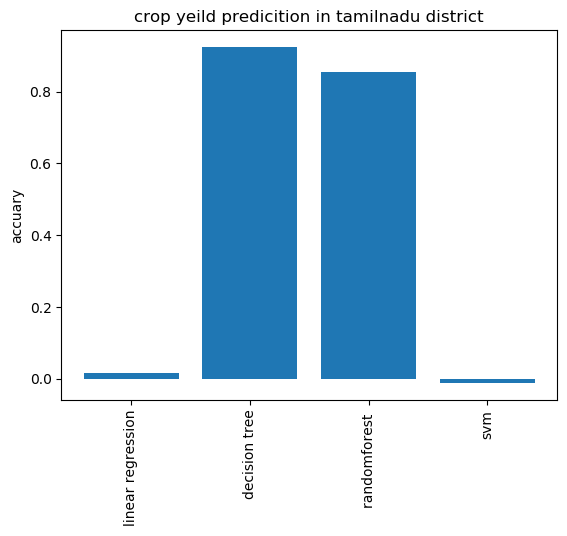

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = ('linear regression', 'decision tree', 'randomforest ', 'svm')
y_pos = np.arange(len(objects))
performance = [0.0168664679537881,0.9247192083825732,0.856355991059602,-0.011638635887455173]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('accuary')
plt.title('crop yeild predicition in tamilnadu district')
plt.show()

In [42]:
import pickle
with open("crop_dc.pickle","wb") as f:
    pickle.dump(dc1,f)

In [43]:
dc1.predict([[6,3,28,45,2345,1,1,1,1,1,1]])

array([52030000.])